In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import scipy.stats as stats
import numpy as np
import seaborn as sns
import glob
import numpy as np
from numpy import random

In [2]:
# code
def load_csv(file_path):
    return pd.read_csv(file_path, index_col=None, sep=",")
     
def calculate_crawling_distance(x, y):
    return (x**2 + y**2)**(1/2)

def plots(kind):
    
    fig = plt.figure(figsize=(10,10))
    
    axes = fig.subplots(2, 2).flatten()
    for i, y in enumerate(exp):
        p = sns.catplot(data=means, x="line", y=y, kind=kind, ax=axes[i], palette=palette )
        plt.close(p.fig)

In [8]:
csv.to_csv("data/behavioral-tests-elav.csv")
csv["peristaltic movements per 30 seconds"] = csv[["p1", "p2", "p3"]].mean(axis=1)
csv["number of reorientation points"] = csv[["r1", "r2", "r3"]].mean(axis=1)
csv["righting time"] = csv[["o1", "o2", "o3"]].mean(axis=1)


def process(row):
    return np.mean([
        calculate_crawling_distance(row["d1x"], row["d1y"]),
        calculate_crawling_distance(row["d2x"], row["d2y"]),
        calculate_crawling_distance(row["d3x"], row["d3y"])])
    
csv["distance [mm]"] = csv.apply(process, axis=1)

csv.head()

,Unnamed: 0,Unnamed: 0.1,line,larva,p1,d1x,d1y,r1,p2,d2x,...,d3x,d3y,r3,o1,o2,o3,peristaltic movements per 30 seconds,number of reorientation points,righting time,distance [mm]
0,0,0,elavxCG4190,1,47.303915,6.973449,7.566032,2.548057,28.788932,4.099633,...,-0.676637,8.649074,2.480478,21.316919,30.967507,18.348177,29.972912,2.586446,23.544201,8.219682
1,1,1,elavxCG4190,2,14.402745,-7.436081,-7.787919,2.336153,19.735895,-15.097646,...,1.958964,6.782518,2.506494,24.375558,23.292014,18.600967,16.631376,2.696495,22.089513,12.146212
2,2,2,elavxCG4190,3,13.971105,1.480866,15.798667,0.864366,20.528412,-4.565244,...,8.416602,10.197752,2.810047,2.765282,22.764804,18.324545,17.498256,2.275049,14.618211,11.661711
3,3,3,elavxCG4190,4,21.291473,-9.694307,12.519238,2.265090,25.457309,0.799311,...,1.496020,-5.075060,3.324055,17.377931,19.760460,20.402023,18.793616,2.987873,19.180138,8.289182
4,4,4,elavxCG4190,5,23.012918,11.899533,-1.077690,2.919921,26.350809,-6.928659,...,11.040848,3.013507,2.437305,22.923364,19.968893,19.254977,19.773100,2.881928,20.715745,10.407319


In [9]:
means = csv[["line", "peristaltic movements per 30 seconds", "number of reorientation points", "righting time", "distance [mm]"]]

means.head()

,line,peristaltic movements per 30 seconds,number of reorientation points,righting time,distance [mm]
0,elavxCG4190,29.972912,2.586446,23.544201,8.219682
1,elavxCG4190,16.631376,2.696495,22.089513,12.146212
2,elavxCG4190,17.498256,2.275049,14.618211,11.661711
3,elavxCG4190,18.793616,2.987873,19.180138,8.289182
4,elavxCG4190,19.773100,2.881928,20.715745,10.407319


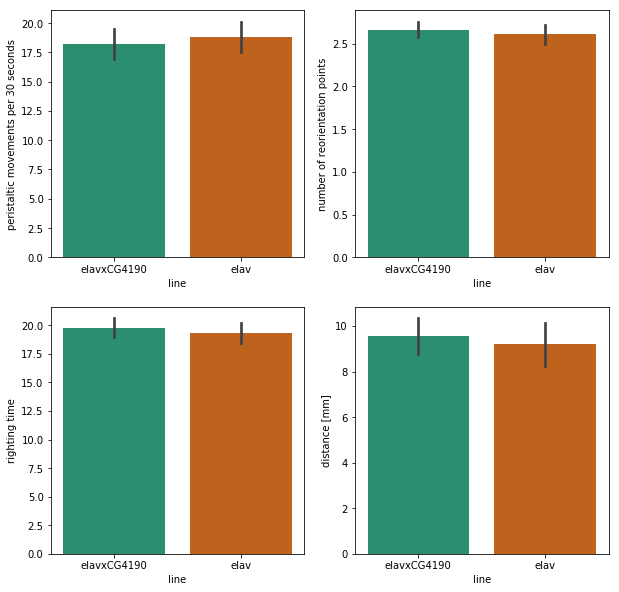

In [10]:
exp = ["peristaltic movements per 30 seconds", "number of reorientation points", "righting time", "distance [mm]"]
palette="Dark2"

plots("bar")
#plt.savefig("behavioral_tests_plot-elav")

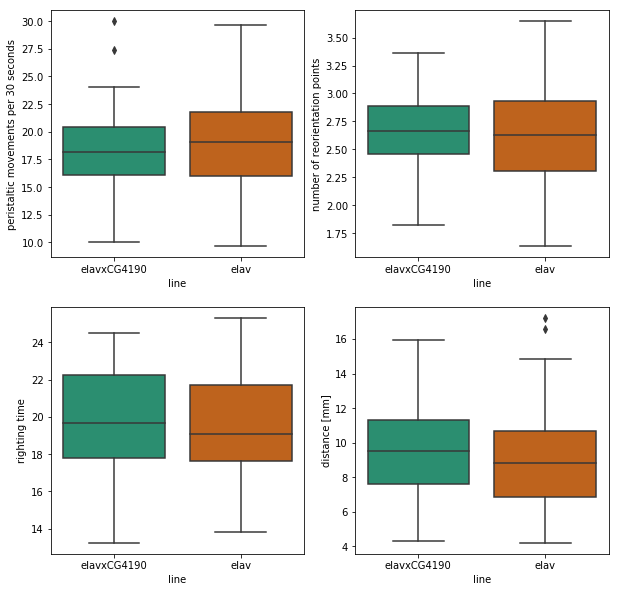

In [11]:
plots("box")
#plt.savefig("behavioral_tests_box-elav")

In [12]:

for i in exp:
    print( "Experiment: " + str(i))
    print("P-value: " + str(ttest_ind(means.loc[0:45, i],
          means.loc[45:, i])[1]) + "\n")


Experiment: peristaltic movements per 30 seconds
P-value: 0.3822898340994494

Experiment: number of reorientation points
P-value: 0.5360107290500249

Experiment: righting time
P-value: 0.4765998206191797

Experiment: distance [mm]
P-value: 0.591569606713786



# Corelation between experiments for each individual

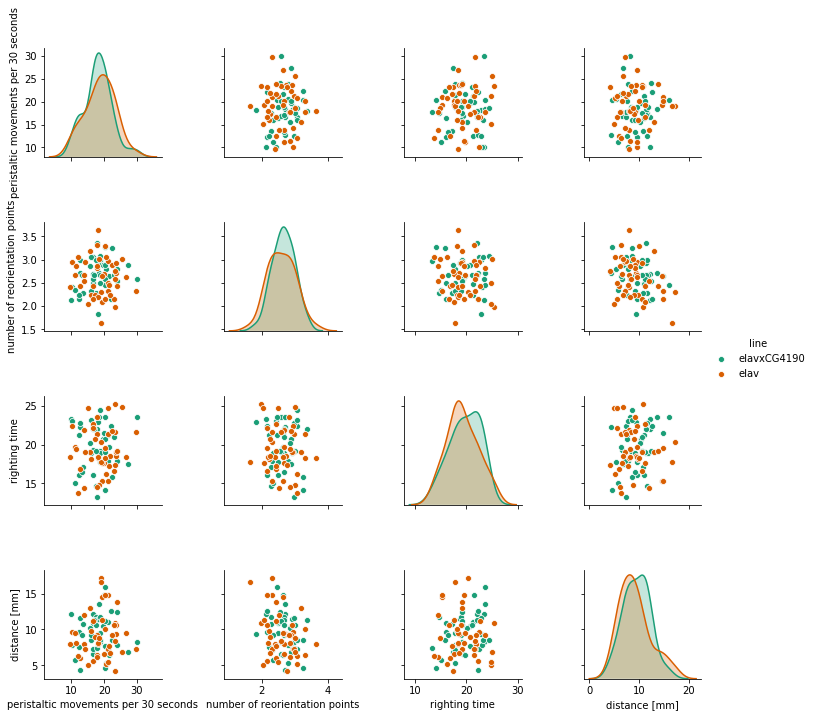

In [13]:
#sns.pairplot(means, hue="line", kind="reg", palette=palette)
sns.pairplot(means, hue="line", palette=palette);

#plt.savefig("behavioral_tests_dependencies_elav")

In [ ]:
sns.pairplot(means, hue="line", palette=palette);

In [ ]:
def hists():
    fig = plt.figure(figsize=(15,10))
    axes = fig.subplots(2, 2).flatten()
    for i, y in enumerate(exp):
        bins=10
        p = sns.distplot(means.loc[0:45, y],
            ax=axes[i],
            kde=True,
            #bins=bins,
            color="seagreen",
            kde_kws={"label": "elav x CG4190"});
        
        x = sns.distplot(means.loc[45:, y],
            ax=axes[i],
            kde=True,
            color="darkorange",
           # bins=bins,
            kde_kws={"label": "elav"});
        

hists()
#plt.savefig("behavioral_tests_hists_elav")